In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import cast

#### Instructions

Activity For Day 2 - Housing Price Prediction using Linear Regression

 

Objective: The objective of this activity is to apply linear regression to predict housing prices based on a housing dataset. Through this activity, participants will gain hands-on experience in implementing linear regression, interpreting the results, and evaluating the model's performance.

##### Materials:

Housing dataset (e.g., a CSV file containing housing features and corresponding prices): housing_dataset-1.csvDownload housing_dataset-1.csv
Python programming environment with libraries such as pandas, scikit-learn, and matplotlib installed
 

##### Instructions:

Data Exploration and Data Preprocessing:

Show the basic measurements and statistical descriptions of the data set. 
Preprocess the data by renaming the columns based on the standard nomenclature. 
Count the entries and the null items.
Determine the outliers in the house pricing column.
##### Linear Regression Model:

Provide the following models:
Simple Linear Regression (Each feature will be paired with the house price)

determine the regression equation for each pair. 

determine the correlation coefficient for each pair.
visualize the scatterplot.

determine the accuracy of the model. Determine if it is underfit, overfit, or correct. 

Create an interface wherein:
the user will select which feature will be considered, 
the user will enter a value for the feature (users will be limited to the maximum and minimum values of each feature),
the program will show the predicted price based on the equation of that feature with the pricing (the program should remind the user about the accuracy of the model).

Multiple Linear Regression (Using each feature with the housing price)
determine the regression equation for this model. 
determine the accuracy of the model. Determine if it is underfit, overfit, or correct.
Create an interface wherein: 
the user will enter a value for each of the features (users will be limited to the maximum and minimum values of each feature),
the program will show the predicted price (the program should remind the user about the accuracy of the model).
 

##### Discussion and Reflection

How did you preprocess the housing dataset?

What steps did you take to handle missing values and encode categorical variables?

What are the interpretations of the coefficients obtained from the linear regression model in the context of the housing dataset?

How did you evaluate the performance of the linear regression model?

What do the evaluation metrics indicate about the model's accuracy?

What patterns or deviations did you observe in the visualization of the predicted housing prices?

How do these visualizations contribute to your understanding of the model's performance?

Based on your experience in building the linear regression model, what improvements or enhancements would you suggest to make the predictions more accurate?

In [75]:
# Read the data
housing_df = pd.read_csv('datasets/housing_dataset-1.csv')

# Clean the columns name
housing_df.columns = housing_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [76]:
housing_df.head()

,no,transaction_date,house_age,distance_to_the_nearest_mrt_station,number_of_convenience_stores,y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,37.9
1,2,2012.917,19.5,306.59470,9,42.2
2,3,2013.583,13.3,561.98450,5,47.3
3,4,2013.500,13.3,561.98450,5,54.8
4,5,2012.833,5.0,390.56840,5,43.1


In [77]:
# Create the correlation matrix of the housing_df
corr_matrix = housing_df.corr()

# Extract the following correlation values from the matrix
corr_age = corr_matrix['house_age']
corr_dis = corr_matrix['distance_to_the_nearest_mrt_station']
corr_rad = corr_matrix['number_of_convenience_stores']


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def validate_correlation_strength(r_score: float) -> str:
    # Check the accuracy of the model
    scale = {
        'very_strong': 1,
        'strong': 0.75,
        'considerable': 0.5,
        'very_weak': 0.25,
        'negligible': 0
    }
    
    for key in scale:
        if(abs(r_score) >= scale[key]):
            return key


def compute_regression(target: str, value: int, is_multiple_regression: bool = False):
    x = housing_df[[target]]
    y = housing_df['y_house_price_of_unit_area']

    # Fit the model
    model = LinearRegression().fit(x, y)
    predictions = model.predict(x)

    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=housing_df, x=target, y='y_house_price_of_unit_area', color='blue')

    # Add the regression line
    line = model.intercept_ + model.coef_[0] * housing_df[target]
    plt.plot(housing_df[target], line, 'r', label=f'y={model.intercept_:.2f}+{model.coef_[0]:.2f}*x')

    print(f"\nRegression equation for: {target}")
    print("House Price = ", model.intercept_, '+', model.coef_[0], '*', value)
    print(f'\nR-squared for {target}: {r2_score(y, predictions)}')
    prediction_value = model.intercept_ + model.coef_[0] * value
    
    print(f'Predicted House Price for {target} = {prediction_value}')

    # Validate the correlation strength
    print(f'Correlation strength for {target}: {validate_correlation_strength(corr_matrix[target]["y_house_price_of_unit_area"])}')

    plt.legend()
    plt.title(f'Regression of {target} on House Price')
    plt.grid(True)
    plt.show()


    

HTML(value='<h1>Multiple Linear Regression</h1>')

Dropdown(description='Target:', options=('house_age', 'distance_to_the_nearest_mrt_station', 'number_of_conven…

FloatText(value=25.0, description='Value:', style=DescriptionStyle(description_width='initial'))

Button(description='Generate Regression', style=ButtonStyle())


Regression equation for: house_age
House Price =  42.43469704626289 + -0.2514884190853454 * 25.0

R-squared for house_age: 0.04433848097791171
Predicted House Price for house_age = 36.147486569129256
Correlation strength for house_age: negligible


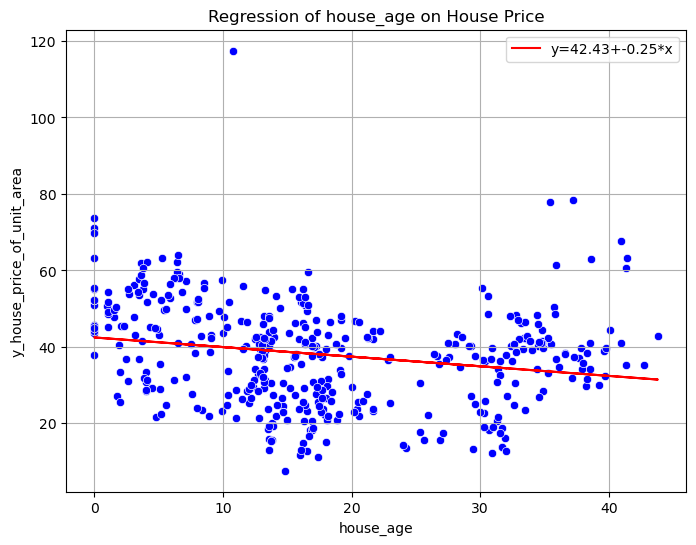

In [79]:
import ipywidgets as widgets
from IPython.display import display, clear_output


title = widgets.HTML(value="<h1>Regression of House Price on Housing Features</h1>")

# Create a dropdown list of all the targets to choose from
targets = ['house_age', 'distance_to_the_nearest_mrt_station', 'number_of_convenience_stores']

clear_output(wait=True)

selected_target = targets[0]
target_dropdown = widgets.Dropdown(options=targets, value=selected_target, description='Target:')
target_dropdown.style = {'description_width': 'initial'}

target_input = widgets.FloatText(value=0, description='Value:')
target_input.style = {'description_width': 'initial'}

# Create a button to confirm the selection
confirm_button = widgets.Button(description='Generate Regression')

display(title,target_dropdown, target_input, confirm_button)

# Handle the click event of the button
def on_confirm_pressed(_):
    clear_output(wait=True)

    target = cast(str, target_dropdown.value)
    input = cast(int, target_input.value)

    clear_output(wait=True)
    display(title, target_dropdown, target_input, confirm_button)
    
    if(input == 0):
        print("Please enter a value for the target")
        return 
    
    # Validate the input based on the min max values of the selected
    # target
    data = housing_df[target]
    min_value = data.min()
    max_value = data.max()
    
    if(input < min_value or input > max_value):
        print(f"Please enter a value between {min_value} and {max_value}")
        return
    
    compute_regression(target, input)

confirm_button.on_click(on_confirm_pressed)

#### Multiple Linear Regression ####

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def compute_multiple_regression(values: list[int]):
    '''
    Multiple Linear Regression (Using each feature with the housing price)
        determine the regression equation for this model. 
        determine the accuracy of the model. Determine if it is underfit, overfit, or correct.
        Create an interface wherein: 
        the user will enter a value for each of the features (users will be limited to the maximum and minimum values of each feature),
        the program will show the predicted price (the program should remind the user about the accuracy of the model).    
    '''

    # Before starting make sure that the values are within the min and max values of the features
    # Validate the input based on the min max values of the data sets

    x = housing_df[['house_age', 'distance_to_the_nearest_mrt_station', 'number_of_convenience_stores']]
    
    for i in range(len(values)):
        data = x.iloc[:, i]
        target = data.name
        min_value = data.min()
        max_value = data.max()

        if(values[i] < min_value or values[i] > max_value):
            print(f"{target} Please enter a value between {min_value} and {max_value}")
            return

    y = housing_df['y_house_price_of_unit_area']

    # Fit the model
    model = LinearRegression().fit(x, y)
    predictions = model.predict(x)

    intercept = model.intercept_
    coefs = model.coef_

    r_score = r2_score(y, predictions)
    price_per_unit_area = intercept + coefs[0] * values[0] + coefs[1] * values[1] + coefs[2] * values[2]

    print(f'Price per unit area: = {intercept:.2f} \
          + {coefs[0]:.2f} * house_age \
          + {coefs[1]:.2f} * distance_to_the_nearest_mrt_station \
          + {coefs[2]:.2f} * number_of_convenience_stores')
    print(f'Predicted price per unit area: {price_per_unit_area:.2f}')

    print ("R-squared: ", r_score)
    
    # Validate the correlation strength
    print(f'Correlation strength for Multiple Linear Regressions: {validate_correlation_strength(r_score)}')



In [81]:
import ipywidgets as widgets
from IPython.display import display, clear_output

clear_output(wait=True)

def get_min_max_values(data, target):
    min_value = data[target].min()
    max_value = data[target].max()
    return min_value, max_value

title = widgets.HTML(value="<h1>Multiple Linear Regression</h1>")
age_max, age_min = get_min_max_values(housing_df, 'house_age')
age_input = widgets.FloatText(value=0, description='Age:', min=age_min, max=age_max)
age_input.style = {'description_width': 'initial'}

distance_max, distance_min = get_min_max_values(housing_df, 'distance_to_the_nearest_mrt_station')
distance_input = widgets.FloatText(value=0, description='Distance:', min=distance_min, max=distance_max)
distance_input.style = {'description_width': 'initial'}

stores_max, stores_min = get_min_max_values(housing_df, 'number_of_convenience_stores')
stores_input = widgets.FloatText(value=0, description='Stores:', min=stores_min, max=stores_max)
stores_input.style = {'description_width': 'initial'}


# Create a button to confirm the selection
confirm_button = widgets.Button(description='Generate Regression')

display(title, age_input, distance_input, stores_input, confirm_button)

# Handle the click event of the button
def on_confirm_pressed(_):
    age = cast(int, age_input.value)
    distance = cast(int, distance_input.value)
    stores = cast(int, stores_input.value)

    clear_output(wait=True)
    display(title, age_input, distance_input, stores_input, confirm_button)
    
    compute_multiple_regression([age, distance, stores])

confirm_button.on_click(on_confirm_pressed)

HTML(value='<h1>Multiple Linear Regression</h1>')

FloatText(value=10.0, description='Age:', style=DescriptionStyle(description_width='initial'))

FloatText(value=25.0, description='Distance:', style=DescriptionStyle(description_width='initial'))

FloatText(value=10.0, description='Stores:', style=DescriptionStyle(description_width='initial'))

Button(description='Generate Regression', style=ButtonStyle())

Price per unit area: = 42.98           + -0.25 * house_age           + -0.01 * distance_to_the_nearest_mrt_station           + 1.30 * number_of_convenience_stores
Predicted price per unit area: 53.29
R-squared:  0.5410632980005725
Correlation strength for Multiple Linear Regressions: considerable


##### Discussion and Reflection

##### How did you preprocess the housing dataset?
- The housing dataset was preprocessed by renaming the columns based on the standard naming conventions.
##### What steps did you take to handle missing values and encode categorical variables?
- There were no missing values in the dataset, and as we are only using numerical data, there was no need to encode categorical variables.

##### What are the interpretations of the coefficients obtained from the linear regression model in the context of the housing dataset?
- The coefficients obtained from the linear regression model varies depending on the feature being tested on, but on average, the coefficients are positive, which means that the feature has a positive correlation with the price of the house. This means that as the value of the feature changes the price of the house also changes.

##### How did you evaluate the performance of the linear regression model?
- The performance of the linear regression model was evaluated using a pre-defined scale that ranges from -1 to 1 with its perspective textual equivalent. 

These values are:
```
Very Strong(1),
Strong(0.75),
Considerable(0.5),
Very Weak(0.25),
Negligible(0)
``` 


##### What do the evaluation metrics indicate about the model's accuracy?
- The evaluation metrics indicate that the model is considerable as the score gets closer to 1, meaning that the model is a good fit for the data.
##### What patterns or deviations did you observe in the visualization of the predicted housing prices?
- The patterns observed in the visualization of the predicted housing prices is that the predicted prices are heavily influenced by the features that have a high correlation with the price of the house, these correlations were determined when we were analyzing the data set.

##### How do these visualizations contribute to your understanding of the model's performance?
- The visualizations contribute to the understanding of the model's performance by showing the relationship between the features and the price of the house. This helps in making the understanding the model's performance easier to digest to the analyst as it shows the correlation between the features and the price of the house in a visualized form.

##### Based on your experience in building the linear regression model, what improvements or enhancements would you suggest to make the predictions more accurate?
- Based on my experience in building the linear regression model, I would suggest that the model be trained with more data to make the predictions more accurate and more robust.